# Task 2: Expolaratory Data Analysis (EDA)

In [8]:
import sys
import os
import pandas as pd
from glob import glob

In [9]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

## Data Loading

In [10]:
# import the module to load the data into dataframes
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 5\\Challenge\\bati-bank-credit-risk-model\\src\\data_loader.py'>

In [13]:
# Load the dataset
data_loader = DataLoader('../data/raw/data.csv')
data = data_loader.load_data()

## EDA

### Overview of the Data

In [15]:
# Display the first 10 rows of the dataset
data.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
# display shape of the dataset
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (95662, 16)


### Summary Statistics

In [17]:
# Overview of the Data
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [18]:
# print categorical columns
print("Categorical columns:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"- {col}")

Categorical columns:
- TransactionId
- BatchId
- AccountId
- SubscriptionId
- CustomerId
- CurrencyCode
- ProviderId
- ProductId
- ProductCategory
- ChannelId
- TransactionStartTime


In [ ]:
# print numerical columns
print("Numerical columns:")
for col in data.select_dtypes(include=['number']).columns:
    print(f"- {col}")         

Numerical columns:
- CountryCode
- Amount
- Value
- PricingStrategy
- FraudResult


In [23]:
# describe the numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
# describe the numerical columns
numerical_description = data[numerical_columns].describe()
# describe the categorical columns
categorical_description = data[categorical_columns].describe()
# print the numerical description
print("Numerical Description:")
print(50* "-")
display(numerical_description)
print(50* "*")
# print the categorical description
print("Categorical Description:")
print(50* "-")
display(categorical_description)
print(50* "*")



Numerical Description:
--------------------------------------------------


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


**************************************************
Categorical Description:
--------------------------------------------------


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


**************************************************


### Distribution of Numerical Features

In [76]:
# Import module for data visualization
from src.visualization import DataVisualizer
import src.visualization
reload(src.visualization)

<module 'src.visualization' from 'D:\\Research & Project\\10academy\\week 5\\Challenge\\bati-bank-credit-risk-model\\src\\visualization.py'>

In [78]:
# initialize the DataVisualizer class
data_visualizer = DataVisualizer(data)

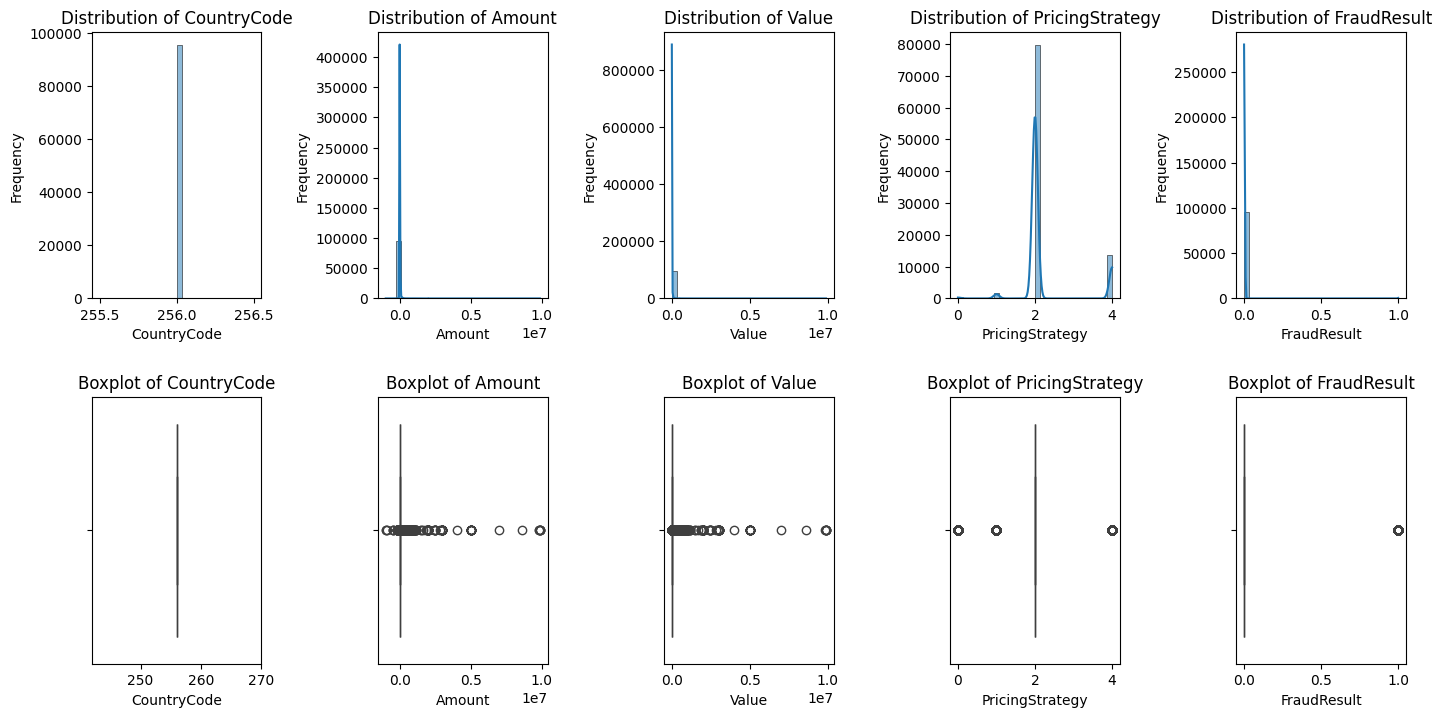

In [40]:
# distribution of numerical features
data_visualizer.plot_numerical_distribution(numerical_columns)

### Distribution of Categorical Features

In [42]:
# distribution of categorical features
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductCategory','ChannelId', 'PricingStrategy', 'FraudResult']

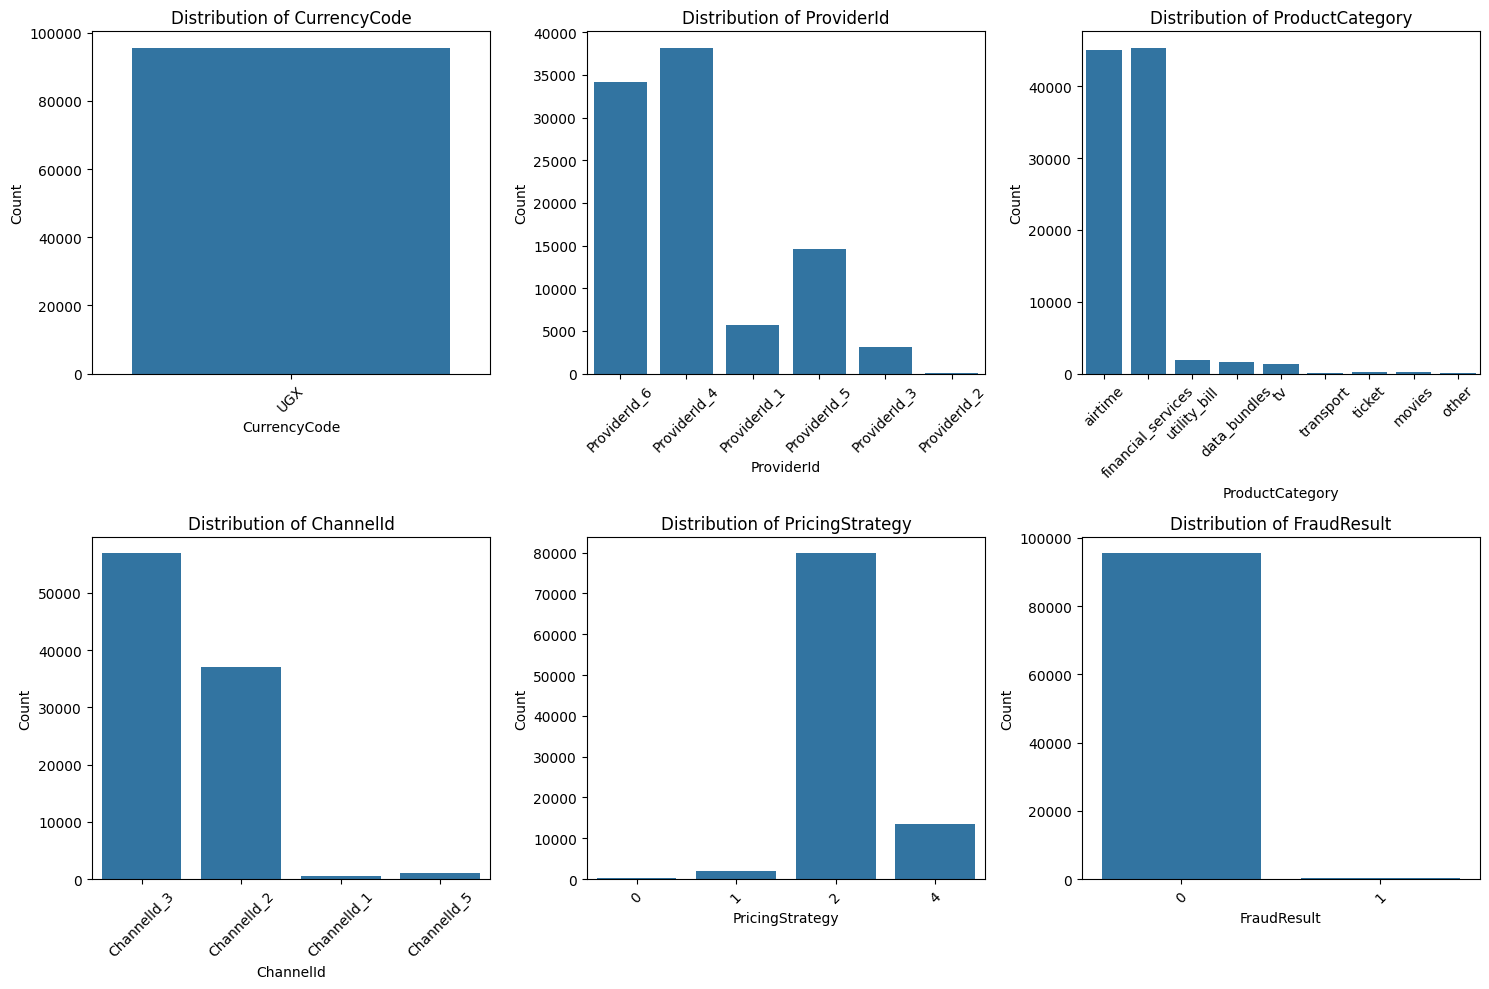

In [59]:
data_visualizer.plot_categorical_distribution(categorical_columns)

### Correlation Analysis

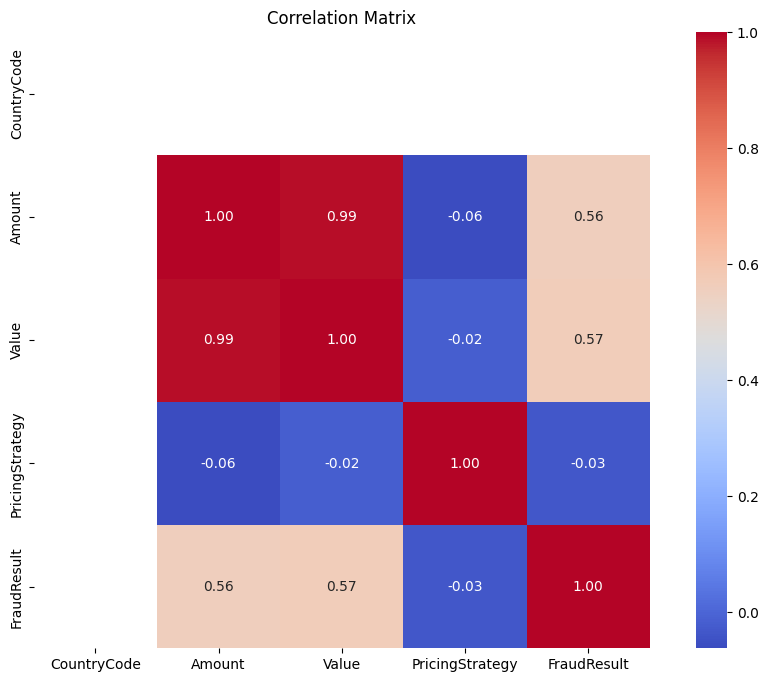

In [66]:
data_visualizer.plot_correlation_matrix(numerical_columns)

### Identifying Missing Values

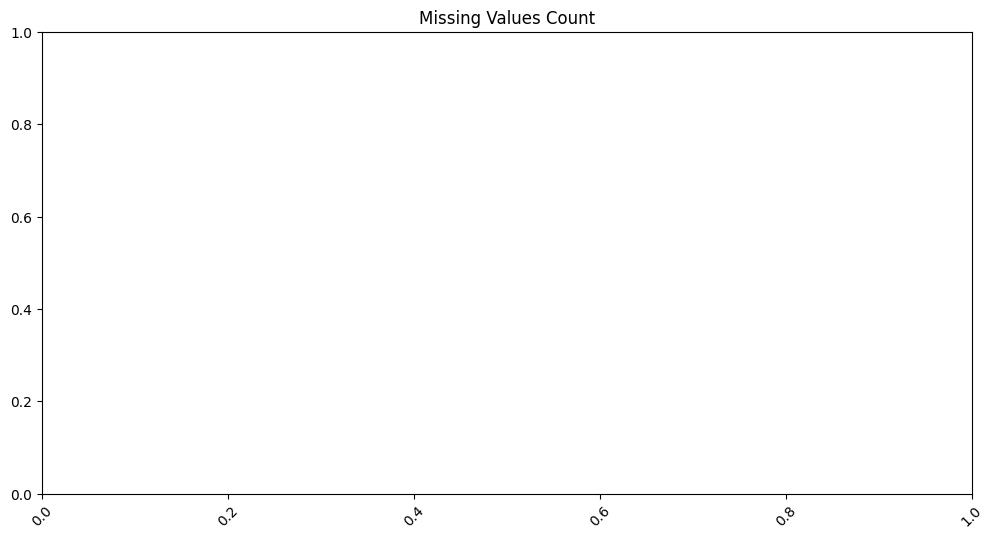

In [80]:
# identifying missing values
data_visualizer.analyze_missing_values()